In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

In [2]:
motor_collisions= pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Mariam_work\archive (2)\Motor_Vehicle_Collisions_-_Crashes.csv")
motor_collisions.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_8608\1570041639.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  motor_collisions= pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Mariam_work\archive (2)\Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'The structure of the dataset is {motor_collisions.shape}, it has {motor_collisions.shape[0]} rows and {motor_collisions.shape[1]} columns.')
for cols in motor_collisions:
    print(f"Column: {cols:35} | type:{str(motor_collisions[cols].dtype):7} | missing_values% {(motor_collisions[cols].isna().sum() / len(motor_collisions) * 100):.2f}%")

The structure of the dataset is (2026647, 29), it has 2026647 rows and 29 columns.
Column: CRASH DATE                          | type:object  | missing_values% 0.00%
Column: CRASH TIME                          | type:object  | missing_values% 0.00%
Column: BOROUGH                             | type:object  | missing_values% 31.11%
Column: ZIP CODE                            | type:object  | missing_values% 31.12%
Column: LATITUDE                            | type:float64 | missing_values% 11.36%
Column: LONGITUDE                           | type:float64 | missing_values% 11.36%
Column: LOCATION                            | type:object  | missing_values% 11.36%
Column: ON STREET NAME                      | type:object  | missing_values% 21.08%
Column: CROSS STREET NAME                   | type:object  | missing_values% 37.49%
Column: OFF STREET NAME                     | type:object  | missing_values% 83.48%
Column: NUMBER OF PERSONS INJURED           | type:float64 | missing_values% 0.

In [4]:
# Checking for duplicates 
def columsn_with_duplicates(df, show_examples = False):
     dup_info = {}
     for col in df.columns:
        dup_mask = df[col].duplicated(keep=False)  # Mark all dup instances
        if dup_mask.any():
            unique_count = df[col].nunique()
            total_rows = len(df)
            dup_info[col] = {
                'unique_values': unique_count,
                'duplicate_percentage': (1 - unique_count / total_rows) * 100
            }
            if show_examples:
                examples = df[dup_mask][col].unique()[:5]  # First 5 dup values
                dup_info[col]['example_duplicates'] = examples.tolist()
        return dup_info

info = columsn_with_duplicates(motor_collisions, show_examples=True)
print(info)

{'CRASH DATE': {'unique_values': 4095, 'duplicate_percentage': 99.79794211818832, 'example_duplicates': ['09/11/2021', '03/26/2022', '06/29/2022', '12/14/2021', '04/14/2021']}}


In [5]:
motor_collisions.dropna(subset=['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'], inplace=True)
motor_collisions.drop(columns=['OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [6]:
motor_collisions.rename(columns={'VEHICLE TYPE CODE 1':'VEHICLE TYPE', 'CONTRIBUTING FACTOR VEHICLE 1': 'CONTRIBUTING FACTOR'}, inplace=True)

In [7]:
# Dealing with Date/Time 
motor_collisions['CRASH DATE'] = pd.to_datetime(motor_collisions['CRASH DATE'])
motor_collisions['CRASH YEAR'] = motor_collisions['CRASH DATE'].dt.year
motor_collisions['CRASH MONTH'] = motor_collisions['CRASH DATE'].dt.month_name(locale = 'english')
motor_collisions['DAY'] = motor_collisions['CRASH DATE'].dt.day_name()

In [8]:
# Time
motor_collisions['HOUR_of_COLLISION'] = motor_collisions['CRASH TIME'].str[0:2]
motor_collisions['HOUR_of_COLLISION'] = motor_collisions['HOUR_of_COLLISION'].str.replace(':','')
motor_collisions['HOUR_of_COLLISION'] = motor_collisions['HOUR_of_COLLISION'].apply(np.int64)

In [9]:
vehicle_list = motor_collisions['VEHICLE TYPE'].value_counts()
unique_vehicles = vehicle_list.index.tolist()

In [10]:
unique_vehicles

['PASSENGER VEHICLE',
 'Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'SPORT UTILITY / STATION WAGON',
 'TAXI',
 'VAN',
 'Taxi',
 'OTHER',
 'UNKNOWN',
 'BUS',
 'Pick-up Truck',
 '4 dr sedan',
 'SMALL COM VEH(4 TIRES) ',
 'LARGE COM VEH(6 OR MORE TIRES)',
 'Bus',
 'Box Truck',
 'PICK-UP TRUCK',
 'LIVERY VEHICLE',
 'Bike',
 'Van',
 'Tractor Truck Diesel',
 'MOTORCYCLE',
 'Motorcycle',
 'AMBULANCE',
 'Ambulance',
 'Dump',
 'Convertible',
 'PK',
 'Carry All',
 'Garbage or Refuse',
 'E-Bike',
 'Flat Bed',
 'FIRE TRUCK',
 '2 dr sedan',
 'Tractor Truck Gasoline',
 'BICYCLE',
 'E-Scooter',
 'Tow Truck / Wrecker',
 'Moped',
 'Tanker',
 'Chassis Cab',
 'Motorscooter',
 'Concrete Mixer',
 'Refrigerated Van',
 'SCOOTER',
 'Armored Truck',
 'AMBUL',
 'Motorbike',
 'Flat Rack',
 'Beverage Truck',
 '3-Door',
 'van',
 'TRUCK',
 'School Bus',
 'Lift Boom',
 'LIMO',
 'FIRE',
 'TRAIL',
 'Stake or Rack',
 'FDNY',
 'Snow Plow',
 'DUMP',
 'MOPED',
 'E-Sco',
 'TRACT',
 'ambul',
 'Fire',
 'trail',
 'USPS',

In [11]:
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['AMBULANCE','ambul','AMBUL','Ambulance', 'Ambul', 'ambulance', 'FDNY Ambul', 'NYS AMBULA', 'AMBULENCE', 'AMBULACE', 'AMBULANVE', 'FORD AMBUL', 'NYC AMBULA', 'Amb', 'FD AMBULAN', 'AMbul'], 'Ambulance Services'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['TRAIL','Trail','trail','Trailer', 'TRAILEE', 'Trailer', 'TRAILER', 'TRL', 'TRLR', 'trailer', 'EMI-TRAIL', 'trl', 'LTRL', 'NTTRL'], 'Trailers'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['4 dr sedan','3-Door','Sedan', '2 dr'], 'Sedan'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Fire','FIRE','FIRE TRUCK', 'FIRET', 'fire', 'FIRETRUCK', 'FIRE ENGIN', 'Fire Engin', 'firet', 'Fire Truck', 'firetruck', 'Firetruck', 'Firet'], 'Fire Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['LIMO', 'LIMOU', 'Lim'], 'Limosines'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['E-Sco', 'E-Scooter', 'scooter', 'SCOOT', 'scoot', 'Scooter', 'E-SCOOTER', 'GAS SCOOTE', 'PUSH SCOOT', 'kick scoot', 'Motorscoot', 'gas scoote', 'E scooter', '50cc Scoot', 'Scoot'], 'Scooters'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['van', 'VAN', 'Van', 'Van T', 'Van', 'VAN/T', 'VAN T', 'VAN WH', 'VAN TRUCK', 'Van truck', 'Van Camper', 'Vanette', 'VAN E', 'Work van', 'TRUCK VAN', 'MINIVAN', 'VAN/B', 'Mini Van', 'van t', 'VAN/TRUCk'], 'Vans'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Cargo', 'cargo', 'CARGO'], 'Cargos'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['DUMP', 'dump truck', 'Dump truck', 'DUMP TRUCK', 'dump', 'Dump', 'dumps', 'Dumps'], 'Dump Trucks'))


In [12]:
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['MTA BUS', 'MTA B', 'MTA transi', 'MTA V', 'MTA bus'], 'MTA Buses'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Pick-up Truck', 'PICK-UP TRUCK', 'Pickup with mounted Camper', 'PICKUP', 'PICK UP', 'PICKU', 'pick', 'Pick','Pickup', 'Pick Up', 'PICK UP TR', 'Pickup tru', 'PICK-UP TR', 'Pickup tow', 'pickup', 'picku', 'Pick wh', 'PICKUP TRU'], 'Trailers'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Tractor Truck Diesel', 'Tractor Truck Gasoline', 'TRACT', 'tract', 'TRACTOR', 'Tract', 'Tractor', 'trac', 'Tractor tr', 'TRAC', 'tractor tr'], 'Tractor Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['POSTA', 'posta', 'US POSTAL', 'Posta', 'postal bus', 'postal tru', 'POSTAL TRU', 'Post offic', 'postal ser', 'POSTO', 'Postal tru', 'U.S. POSTA'], 'Postal Services'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['FDNY', 'FDNY FIRE', 'FDNY TRUCK', 'fdny', 'FDNY Truck', 'Fdny ems', 'FDNY #226', 'FDNY FIRET', 'FDNY LADER', 'FDNY EMS', 'fdny ems'], 'FDNY Services'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['School Bus', 'SCHOO', 'school', 'SCHOOL BUS', 'School', 'School bus', 'Schoolbus'], 'School Buses'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['MOTORCYCLE', 'Motorcycle', 'Motorbike', 'MOTOR', 'motor', 'Motor'], 'Motorcycles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Motorized Home', 'Motor Home', 'Motorzied', 'MOTOR HOME'], 'Motor Homes'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['LIVERY VEHICLE', 'delivery t', 'Delivery t', 'DELIV', 'deliv', 'Deliv', 'Delivery V', 'DELIVERY V', 'DELIVERY T', 'DELIVERY', 'Delivery'], 'Delivery Vehicles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['USPS', 'usps', 'USPS TRUCK', 'USPS Truck', 'USPS VEHIC', 'USPS truck', 'USPCS', 'USPS/GOVT', 'USPS MAIL', 'USP M', 'USPS2'], 'USPS Services'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['PASSENGER VEHICLE', 'PASSENGER', '12 PASSENG', 'Pass', 'Pas', 'PAS V', 'Pas ( 4dr s', '12 Pa', '15 Pa'], 'Passenger Vehicles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['WAGON', 'wagon', 'Lunch Wagon'], 'Wagons'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['CITY', 'City', 'City Owned'], 'City Owned Vehicles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['tank', 'Tanker', 'TANK', 'TANKE'], 'Tankers'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['WHEEL', 'Multi-Wheeled Vehicle', '3 Whe', '3 WHE', '2 WHE'], 'Wagons'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Food truck', 'Food', 'FOOD', 'FOOD CART'], 'Food Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Garbage or Refuse', 'GARBA', 'GARBAGE TR', 'garba', 'Garbage tr', 'Garbage', 'garbage tr', 'Garbage Tr', 'Garba'], 'Garbage Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['FLAT Bed', 'Flat Rack', 'FLAT', 'FLATB', 'Flatb', 'FLAT-', 'FLATBED TO', 'FLATBED', 'FLAT  BED', 'flat'], 'Flatbed Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['MOPED', 'Moped', 'moped', 'MOPEDS'], 'Mopeds'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Station Wagon/Sport Utility Vehicle', 'SPORT UTILITY/STATION WAGON'], 'SUVS'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['COMME', 'COMMERCIAL', 'COMM', 'comm', 'comme', 'Commercial', 'commercial', 'SCOMM', 'commerical', 'Commer Veh', 'COMMU', 'Comme', 'SMALL COM VEH(4 TIRES)', 'LARGE COM VEH(6 OR MORE TIRES)'], 'Commercial Vehicles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Station Wagon/Sport Utility Vehicle', 'SPORT UTILITY/STATION WAGON'], 'SUVS'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['TAXI', 'Taxi'], 'Taxis'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['YELLO', 'YELLOWPOWE', 'YELLOE TAX', 'YELLOW BUS'], 'Yellow Cabs'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Tow Truck/Wrecker', 'TOW T', 'Tow Truck', 'tow t', 'Tow T', 'Tow', 'TOWER', 'tower', 'Tow truck', 'G Tow', 'tow'], 'Tow Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['Box Truck', 'BOX T', 'box t', 'BOX TRUCK', 'Box truck', 'Box T', 'box truck', 'box', 'BOX', 'BOX H'], 'Box Trucks'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['ELECT', 'electric s', 'Electric S', 'Elect', 'elect', 'ELECTRIC S'], 'Electric Vehicles'))
motor_collisions[['VEHICLE TYPE']] = motor_collisions[['VEHICLE TYPE']].replace(dict.fromkeys(['TAXI', 'Taxi'], 'Taxis'))

In [13]:
def time_category(hour):
    if hour > 5 and hour <= 12:
        return 'Morning'
    elif hour > 12 and hour <=17:
        return 'Afternoon'
    elif hour > 17 and hour <= 21:
        return 'Evening'
    else:
        return 'Night'
    
motor_collisions['TIME_DAY'] = motor_collisions['HOUR_of_COLLISION'].apply(time_category)
motor_collisions[['DAY','HOUR_of_COLLISION', 'TIME_DAY']].head(10)

,DAY,HOUR_of_COLLISION,TIME_DAY
9,Tuesday,14,Afternoon
11,Tuesday,16,Afternoon
14,Tuesday,23,Night
18,Saturday,19,Evening
24,Monday,17,Afternoon
27,Tuesday,12,Morning
28,Tuesday,17,Afternoon
45,Sunday,21,Evening
51,Sunday,15,Afternoon
52,Friday,12,Morning


In [14]:
# Casualty for each category of road users
motor_collisions['TOTAL_CASUALTY'] = motor_collisions['NUMBER OF PERSONS INJURED'] + motor_collisions['NUMBER OF PERSONS KILLED']
motor_collisions['PEDESTRIANS_CASUALTY'] = motor_collisions['NUMBER OF PEDESTRIANS INJURED'] + motor_collisions['NUMBER OF PEDESTRIANS KILLED']
motor_collisions['CYCLIST_CASUALTY'] = motor_collisions['NUMBER OF CYCLIST INJURED'] + motor_collisions['NUMBER OF CYCLIST KILLED']
motor_collisions['MOTORIST_CASUALTY'] = motor_collisions['NUMBER OF MOTORIST INJURED'] + motor_collisions['NUMBER OF MOTORIST KILLED']
motor_collisions[['COLLISION_ID', 'TOTAL_CASUALTY', 'PEDESTRIANS_CASUALTY', 'CYCLIST_CASUALTY', 'MOTORIST_CASUALTY']].head(5)

,COLLISION_ID,TOTAL_CASUALTY,PEDESTRIANS_CASUALTY,CYCLIST_CASUALTY,MOTORIST_CASUALTY
9,4486519,0.0,0,0,0
11,4487127,0.0,0,0,0
14,4486635,2.0,0,0,2
18,4487040,1.0,0,0,1
24,4487001,1.0,0,0,1


In [15]:
# Total Number of Crashes
total_crashes = motor_collisions['COLLISION_ID'].count()
print(f'Total number of crashes from 2019 - 2014 is: {total_crashes}')

Total number of crashes from 2019 - 2014 is: 878154


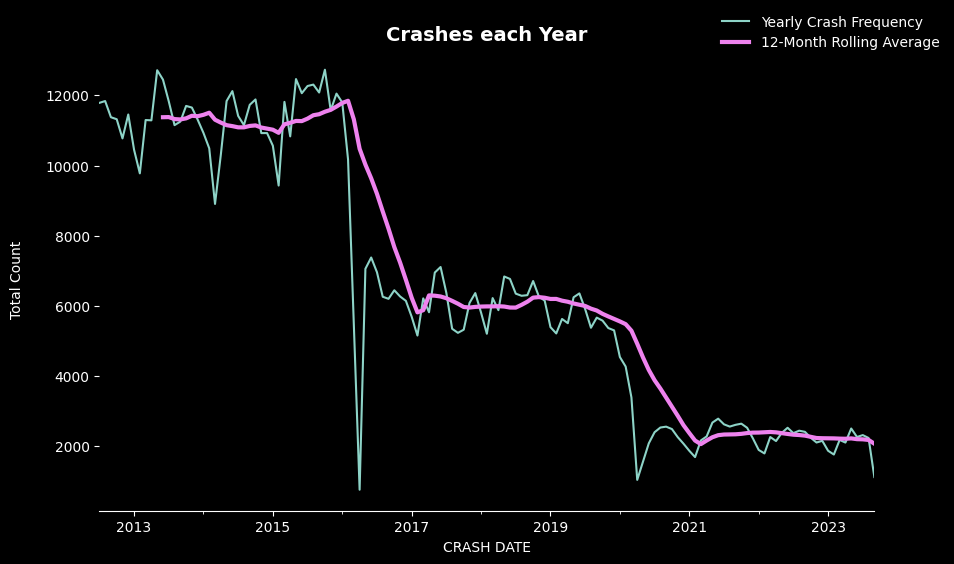

In [16]:
# Frequeny of crashes each year
fig, ax = plt.subplots(figsize=(10,6))
motor_collisions.set_index('CRASH DATE').resample('M').size().plot(ax=ax, label='Yearly Crash Frequency')
motor_collisions.set_index('CRASH DATE').resample('M').size().rolling(window = 12).mean().plot(ax=ax, label='12-Month Rolling Average', color='violet', linewidth = 3)
ax.set_title("Crashes each Year", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

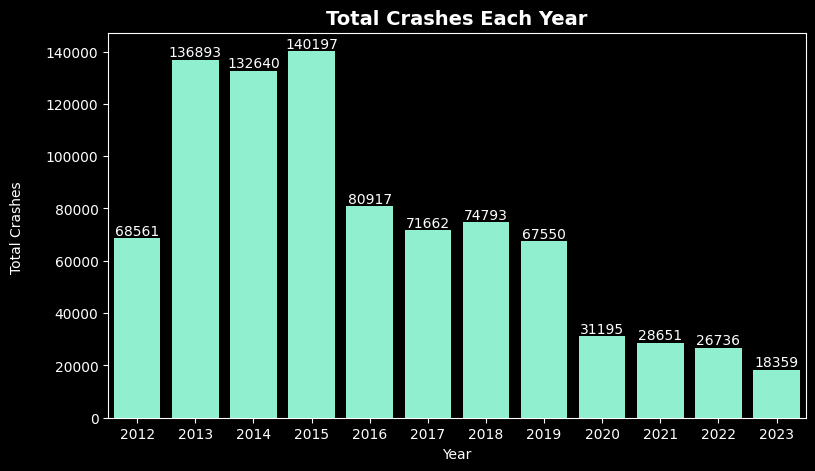

In [17]:
# Total crashes each year
crashes_yearly = motor_collisions.groupby('CRASH YEAR')['COLLISION_ID'].count().reset_index(name='Total Crashes').sort_values(by='CRASH YEAR', ascending=False)
fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data=crashes_yearly, x='CRASH YEAR', y = 'Total Crashes', ax = ax, color='aquamarine')
ax.set_title('Total Crashes Each Year', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='Total Crashes \n', xlabel = 'Year')
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

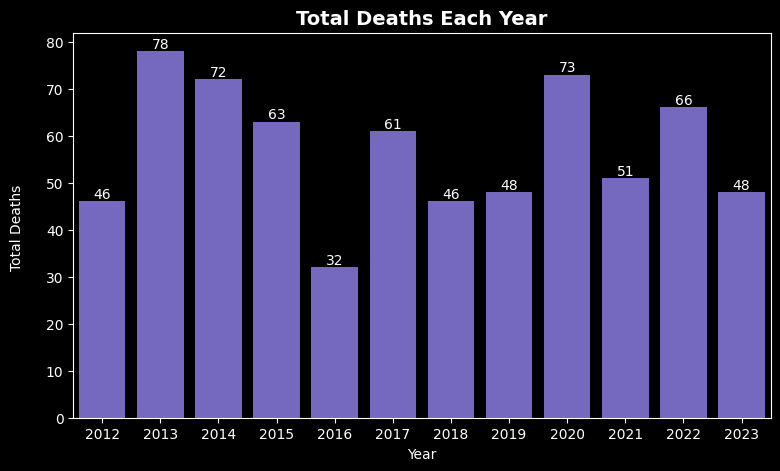

In [18]:
yearly_deaths = motor_collisions.groupby('CRASH YEAR')['NUMBER OF PERSONS KILLED'].sum().reset_index(name = 'Total Deaths').sort_values(by='CRASH YEAR', ascending=False)
fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data=yearly_deaths, x='CRASH YEAR', y = 'Total Deaths', ax = ax, color='slateblue')
ax.set_title('Total Deaths Each Year', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='Total Deaths \n', xlabel = 'Year')
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

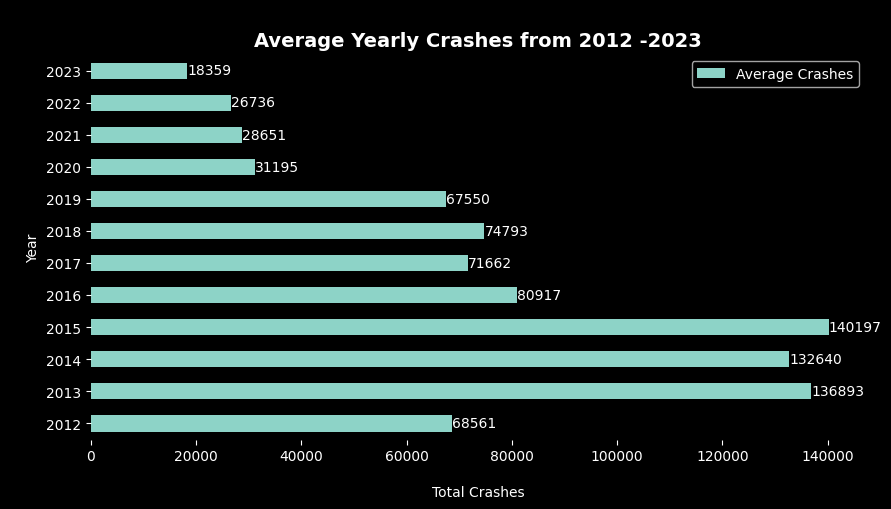

In [19]:
avg_yearly_crashes = motor_collisions.set_index('CRASH DATE').resample('Y').size().reset_index()
avg_yearly_crashes.columns = ['CRASH DATE', 'Total Crashes']
avg_yearly_crashes['YEAR'] = avg_yearly_crashes['CRASH DATE'].dt.year
Avg_Yearly = avg_yearly_crashes.groupby('YEAR')['Total Crashes'].mean().reset_index()
Avg_Yearly.columns = ['Year', 'Average Crashes']
Avg_Yearly.set_index('Year', inplace = True)
Avg_Yearly
Year = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig,ax = plt.subplots(figsize = (10,5))
Avg_Yearly.reindex(Year).plot(kind = 'barh', ax = ax)
ax.set_title('\nAverage Yearly Crashes from 2012 -2023', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='\nYear', xlabel = '\nTotal Crashes')
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars)

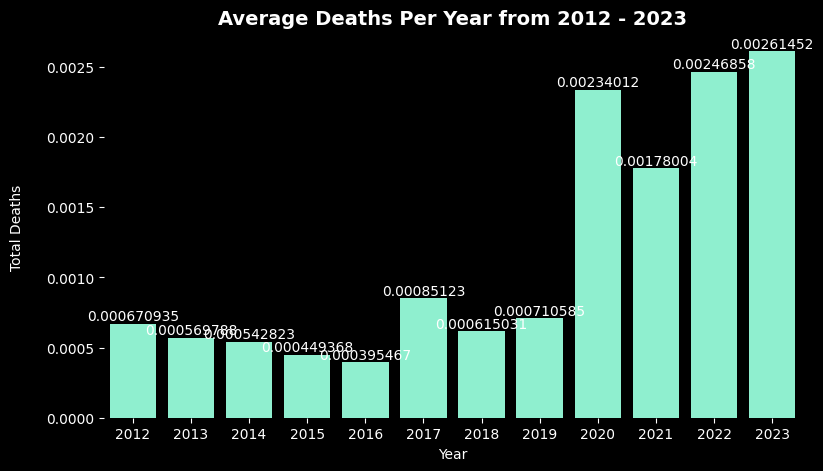

In [20]:
avg_yearly_deaths  = motor_collisions.groupby('CRASH YEAR')['NUMBER OF PERSONS KILLED'].mean().reset_index(name = 'Avg Deaths')
fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data=avg_yearly_deaths, x='CRASH YEAR', y = 'Avg Deaths', ax = ax, color='aquamarine')
ax.set_title('Average Deaths Per Year from 2012 - 2023', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='Total Deaths \n', xlabel = 'Year')
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

In [21]:
# From the data given and other sources online, 2018 is considered as the safest year for nyc road users. With this let take a deeper look into 2018 
motor_collisions_2018 = motor_collisions.loc[motor_collisions['CRASH YEAR'] == 2018]
motor_collisions_2018.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 2,CRASH YEAR,CRASH MONTH,DAY,HOUR_of_COLLISION,TIME_DAY,TOTAL_CASUALTY,PEDESTRIANS_CASUALTY,CYCLIST_CASUALTY,MOTORIST_CASUALTY
53396,2018-05-28,7:00,BRONX,10467.0,40.878643,-73.871605,"(40.878643, -73.871605)",EAST GUN HILL ROAD,WEBSTER AVENUE,1.0,...,Motorcycle,2018,May,Monday,7,Morning,1.0,0,0,1
64155,2018-03-26,0:06,BROOKLYN,11203.0,40.637277,-73.931765,"(40.6372771, -73.9317652)",FARRAGUT ROAD,SCHENECTADY AVENUE,2.0,...,Sedan,2018,March,Monday,0,Night,2.0,0,0,2
123871,2018-03-22,17:00,BROOKLYN,11238.0,40.679203,-73.971720,"(40.679203, -73.97172)",SAINT MARKS AVENUE,CARLTON AVENUE,1.0,...,Sedan,2018,March,Thursday,17,Afternoon,1.0,0,0,1
203715,2018-08-30,14:00,BROOKLYN,11204.0,40.616620,-73.999720,"(40.61662, -73.99972)",NEW UTRECHT AVENUE,74 STREET,0.0,...,Sedan,2018,August,Thursday,14,Afternoon,0.0,0,0,0
203719,2018-08-31,7:55,BRONX,10472.0,40.827168,-73.870125,"(40.827168, -73.870125)",WATSON AVENUE,CROES AVENUE,0.0,...,Sedan,2018,August,Friday,7,Morning,0.0,0,0,0


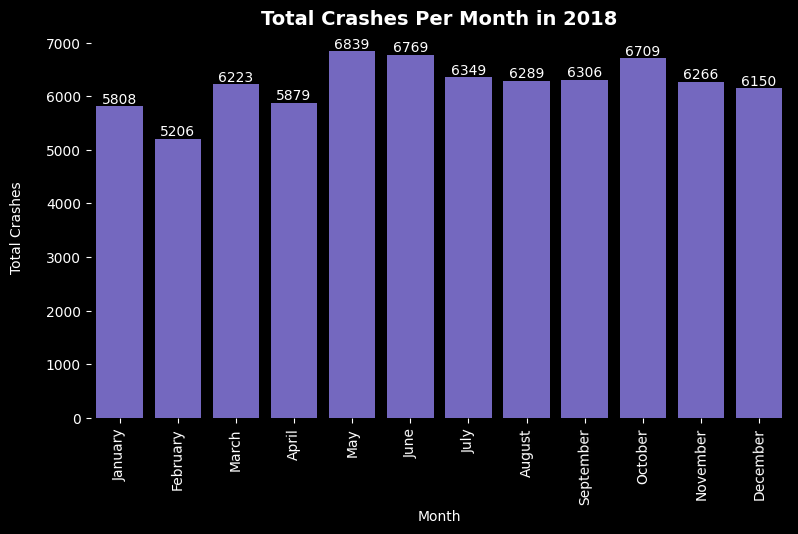

In [22]:
monthly_crashes = motor_collisions_2018.groupby('CRASH MONTH')['COLLISION_ID'].count().reset_index(name='Total Crashes')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_crashes.index=pd.CategoricalIndex(monthly_crashes['CRASH MONTH'],categories=months,ordered=True)
monthly_crashes=monthly_crashes.sort_index().reset_index(drop=True)
fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data=monthly_crashes, x='CRASH MONTH', y = 'Total Crashes', ax = ax, color = 'slateblue')
ax.set_title('Total Crashes Per Month in 2018', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='Total Crashes \n', xlabel = 'Month')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

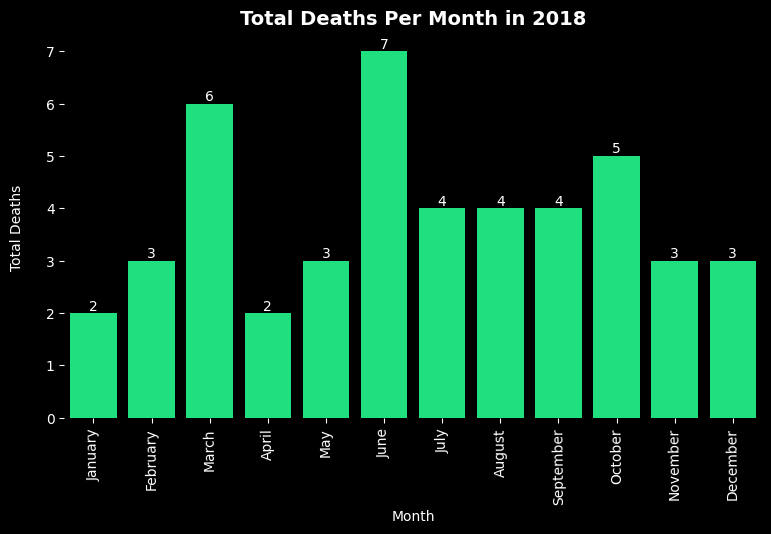

In [23]:
monthly_deaths = motor_collisions_2018.groupby('CRASH MONTH')['NUMBER OF PERSONS KILLED'].sum().reset_index(name='Total Deaths')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_deaths.index=pd.CategoricalIndex(monthly_deaths['CRASH MONTH'],categories=months,ordered=True)
monthly_deaths=monthly_deaths.sort_index().reset_index(drop=True)
fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data=monthly_deaths, x='CRASH MONTH', y = 'Total Deaths', ax = ax, color = 'springgreen')
ax.set_title('Total Deaths Per Month in 2018', fontsize = 14, fontweight = 'bold')
ax.set(ylabel='Total Deaths \n', xlabel = 'Month')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

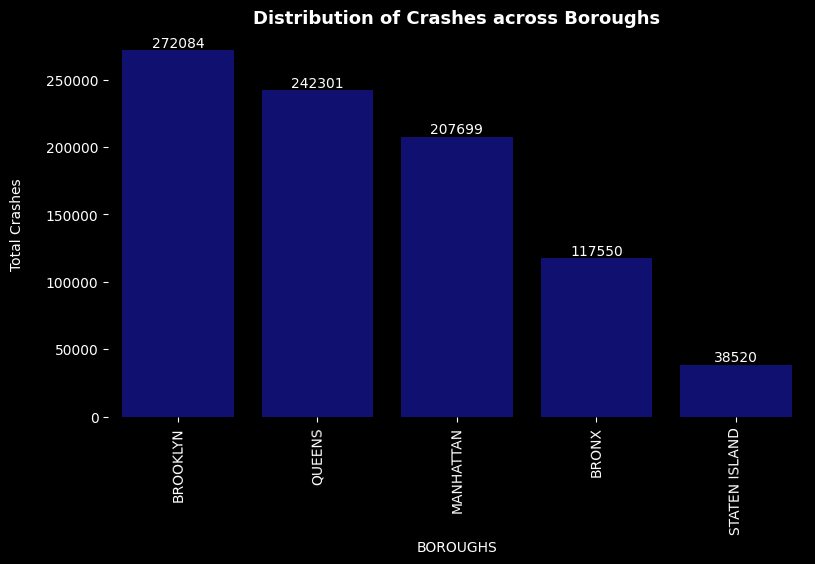

In [24]:
# Distribution of crashes by borough
borough_crashes = motor_collisions.groupby('BOROUGH')['COLLISION_ID'].count().reset_index(name='Total Crashes').sort_values(by='Total Crashes', ascending = False)
fig, ax = plt.subplots(figsize= (9,5))
sns.barplot(data=borough_crashes, x='BOROUGH', y='Total Crashes', ax = ax, color = 'navy')
ax.set_title('Distribution of Crashes across Boroughs', fontsize = 13, fontweight = 'bold')
ax.set(ylabel='Total Crashes\n', xlabel = 'BOROUGHS')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

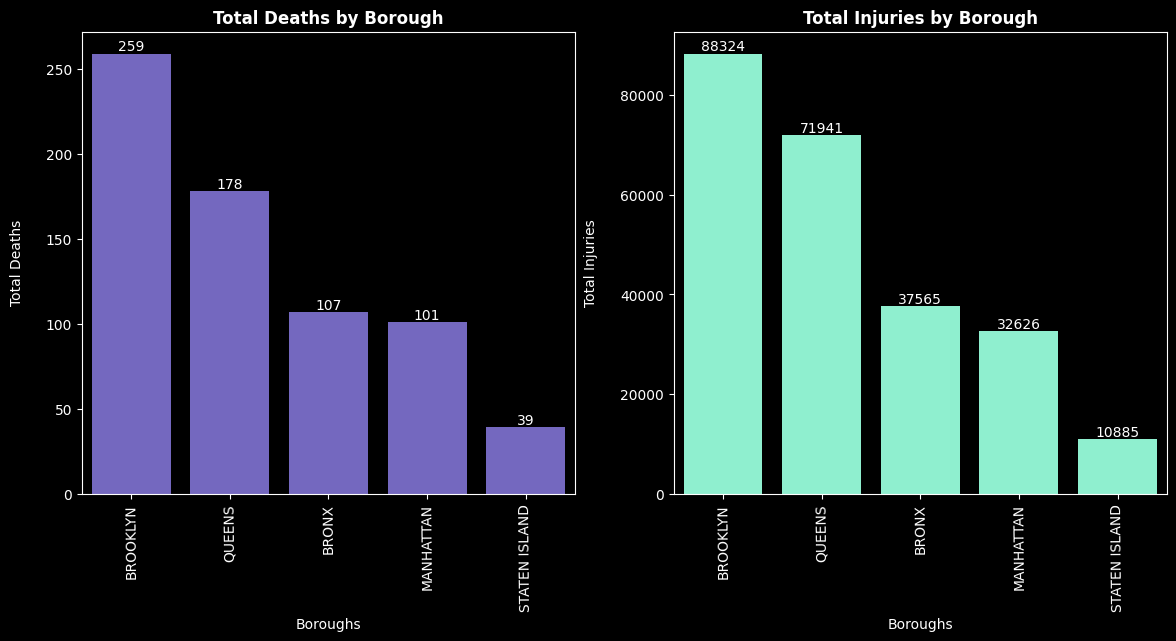

In [25]:
borough_stats = motor_collisions.groupby('BOROUGH').agg({'NUMBER OF PERSONS KILLED':'sum', 'NUMBER OF PERSONS INJURED': 'sum'}).sort_values(['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED'], ascending =[False, False])
borough_stats = borough_stats.reset_index()
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=borough_stats, x = 'BOROUGH', y = 'NUMBER OF PERSONS KILLED', ax=ax[0], color='slateblue')
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF PERSONS INJURED', ax=ax[1], color ='aquamarine')
ax[0].set_title('Total Deaths by Borough', fontsize=12, fontweight = 'bold')
ax[1].set_title('Total Injuries by Borough', fontsize=12, fontweight = 'bold')
ax[0].set(ylabel='Total Deaths\n', xlabel='Boroughs')
ax[1].set(ylabel='Total Injuries\n', xlabel='Boroughs')
for axes in ax:
    axes.tick_params(axis='x', rotation = 90.5)
    for bars in axes.containers:
        axes.bar_label(bars, label_type='edge')

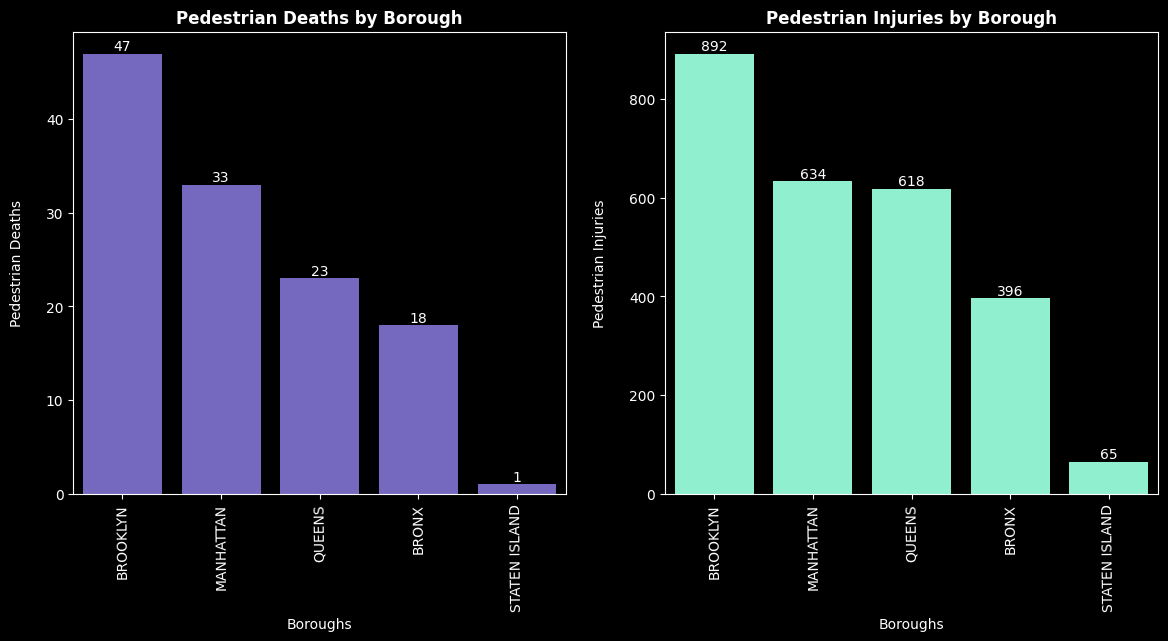

In [26]:
# Pedestrain casualitites by borough
borough_pedestrain = motor_collisions.groupby('BOROUGH').agg({'NUMBER OF PEDESTRIANS KILLED':'sum', 'NUMBER OF PEDESTRIANS INJURED': 'sum'}).sort_values(['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PEDESTRIANS INJURED'], ascending=[False, False])
borough_pedestrain = borough_pedestrain.reset_index()
fig,ax = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=borough_pedestrain, x = 'BOROUGH', y = 'NUMBER OF PEDESTRIANS KILLED', ax=ax[0], color='slateblue')
sns.barplot(data=borough_pedestrain, x='BOROUGH', y='NUMBER OF PEDESTRIANS INJURED', ax=ax[1], color ='aquamarine')
ax[0].set_title('Pedestrian Deaths by Borough', fontsize=12, fontweight = 'bold')
ax[1].set_title('Pedestrian Injuries by Borough', fontsize=12, fontweight = 'bold')
ax[0].set(ylabel='Pedestrian Deaths\n', xlabel='Boroughs')
ax[1].set(ylabel='Pedestrian Injuries\n', xlabel='Boroughs')
for axes in ax:
    axes.tick_params(axis='x', rotation = 90.5)
    for bars in axes.containers:
        axes.bar_label(bars, label_type='edge')


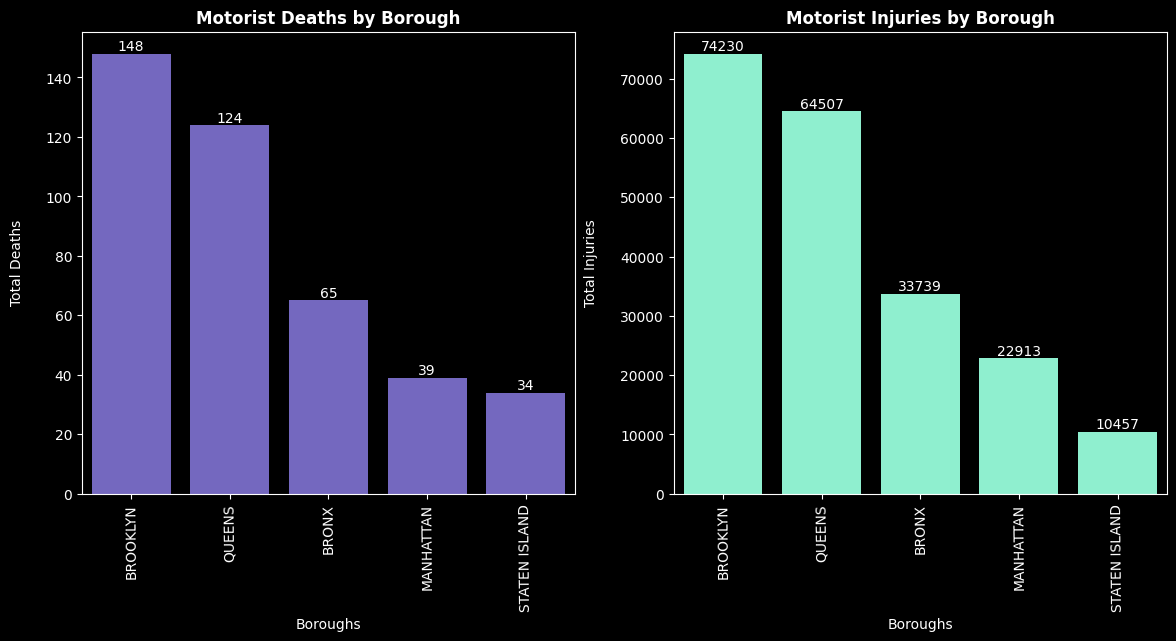

In [27]:
borough_motorist = motor_collisions.groupby('BOROUGH').agg({'NUMBER OF MOTORIST KILLED':'sum', 'NUMBER OF MOTORIST INJURED': 'sum'}).sort_values(['NUMBER OF MOTORIST KILLED', 'NUMBER OF MOTORIST INJURED'], ascending =[False, False])
borough_motorist = borough_motorist.reset_index()
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=borough_motorist, x = 'BOROUGH', y = 'NUMBER OF MOTORIST KILLED', ax=ax[0], color='slateblue')
sns.barplot(data=borough_motorist, x='BOROUGH', y='NUMBER OF MOTORIST INJURED', ax=ax[1], color ='aquamarine')
ax[0].set_title('Motorist Deaths by Borough', fontsize=12, fontweight = 'bold')
ax[1].set_title('Motorist Injuries by Borough', fontsize=12, fontweight = 'bold')
ax[0].set(ylabel='Total Deaths\n', xlabel='Boroughs')
ax[1].set(ylabel='Total Injuries\n', xlabel='Boroughs')
for axes in ax:
    axes.tick_params(axis='x', rotation = 90.5)
    for bars in axes.containers:
        axes.bar_label(bars, label_type='edge')

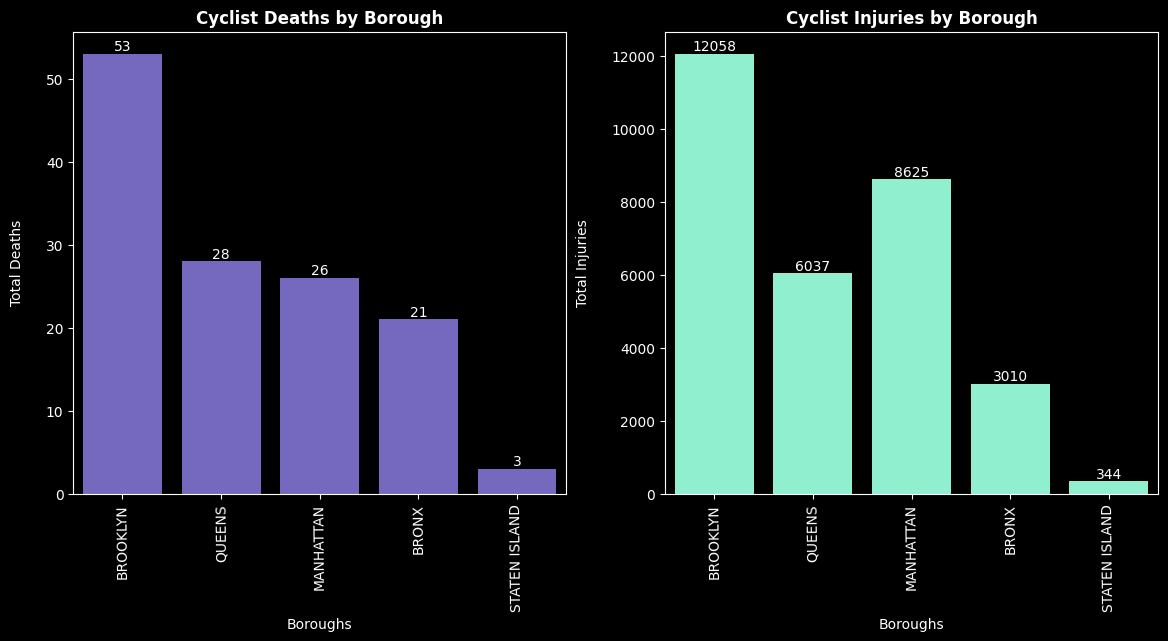

In [28]:
borough_stats = motor_collisions.groupby('BOROUGH').agg({'NUMBER OF CYCLIST KILLED':'sum', 'NUMBER OF CYCLIST INJURED': 'sum'}).sort_values(['NUMBER OF CYCLIST KILLED', 'NUMBER OF CYCLIST INJURED'], ascending =[False, False])
borough_stats = borough_stats.reset_index()
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=borough_stats, x = 'BOROUGH', y = 'NUMBER OF CYCLIST KILLED', ax=ax[0], color='slateblue')
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF CYCLIST INJURED', ax=ax[1], color ='aquamarine')
ax[0].set_title('Cyclist Deaths by Borough', fontsize=12, fontweight = 'bold')
ax[1].set_title('Cyclist Injuries by Borough', fontsize=12, fontweight = 'bold')
ax[0].set(ylabel='Total Deaths\n', xlabel='Boroughs')
ax[1].set(ylabel='Total Injuries\n', xlabel='Boroughs')
for axes in ax:
    axes.tick_params(axis='x', rotation = 90.5)
    for bars in axes.containers:
        axes.bar_label(bars, label_type='edge')

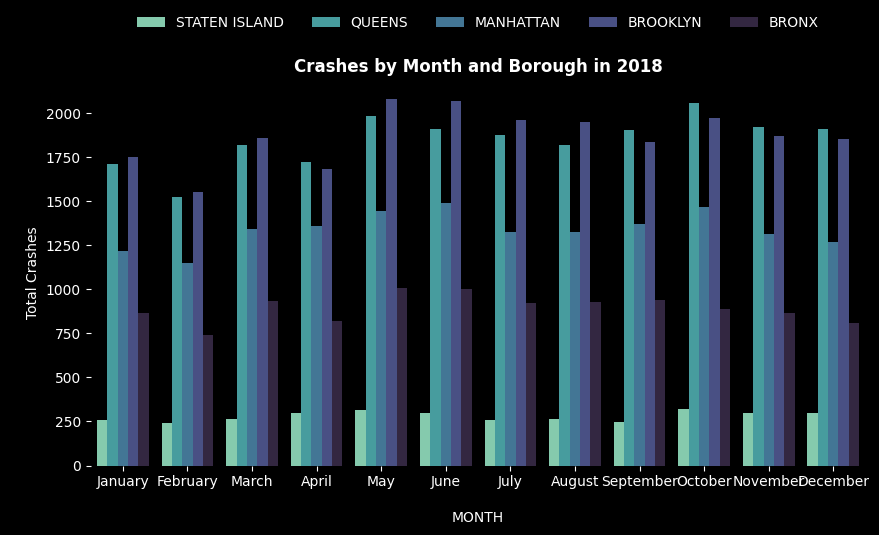

In [29]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
motor_collisions_2018_boroughs = motor_collisions_2018.groupby(['CRASH MONTH', 'BOROUGH'])['COLLISION_ID'].count().reset_index(name='Total Crashes')
motor_collisions_2018_boroughs.index=pd.CategoricalIndex(motor_collisions_2018_boroughs['CRASH MONTH'],categories=months,ordered=True)
motor_collisions_2018_boroughs=motor_collisions_2018_boroughs.sort_index().reset_index(drop=True)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'CRASH MONTH', y = 'Total Crashes', hue = 'BOROUGH', palette='mako_r', data=motor_collisions_2018_boroughs)
ax.set_title('\nCrashes by Month and Borough in 2018', fontsize = 12, fontweight='bold')
ax.set(xlabel = '\nMONTH', ylabel='\nTotal Crashes')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.1), ncol=5, title=None, frameon=False)
sns.despine(left = True, right = True, top=True, bottom=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_8608\2109339611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_collisions_2018['SEASON'] = motor_collisions_2018['CRASH MONTH'].map(seasons_dict)


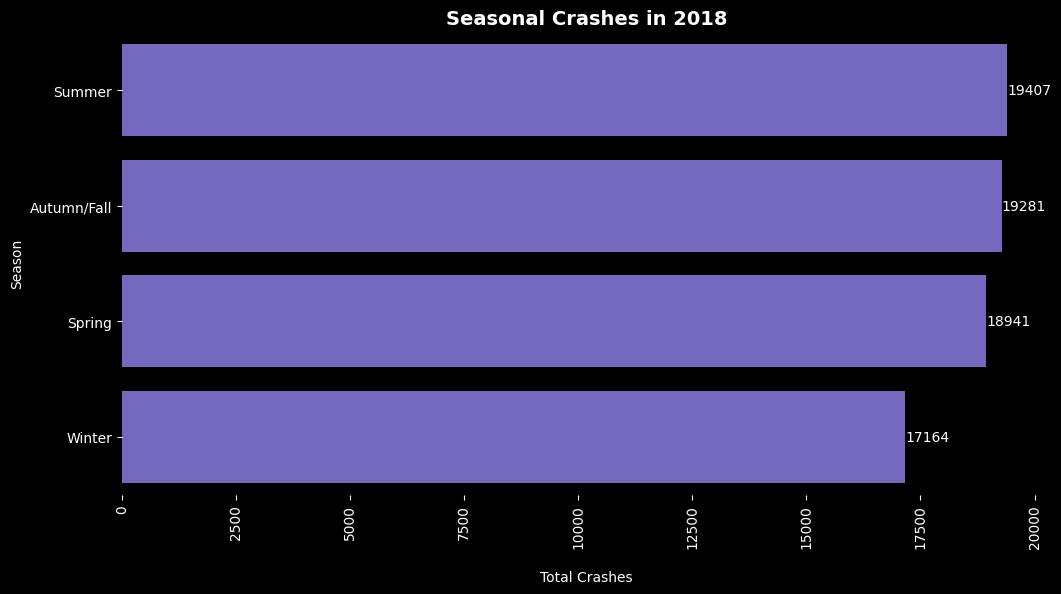

In [30]:
seasons_dict = {'January':'Winter', 'February':'Winter', 'March':'Spring', 'April':'Spring', 'May':'Spring', 'June':'Summer', 'July':'Summer', 'August':'Summer', 'September':'Autumn/Fall', 'October':'Autumn/Fall', 'November':'Autumn/Fall', 'December':'Winter'}
motor_collisions_2018['SEASON'] = motor_collisions_2018['CRASH MONTH'].map(seasons_dict)
seasonal_crashes = motor_collisions_2018.groupby('SEASON')['COLLISION_ID'].count().reset_index(name='Total Crashes').sort_values(by='Total Crashes', ascending=False)
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=seasonal_crashes, x='Total Crashes', y='SEASON', ax=ax, color='slateblue')
ax.set_title('Seasonal Crashes in 2018', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Crashes', ylabel='Season')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

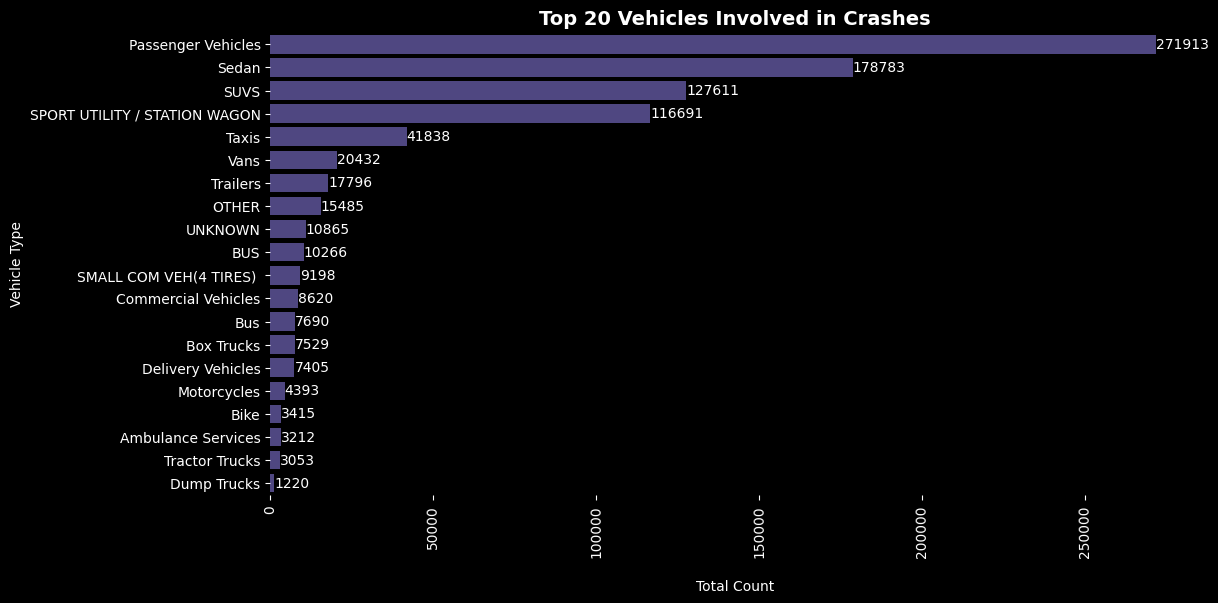

In [31]:
# Distribution of Vehicles involved in crashes
vehicle_dist = motor_collisions.groupby('VEHICLE TYPE')['COLLISION_ID'].count().reset_index(name='Total Count').sort_values(by='Total Count', ascending = False)
vehicle_dist_top = vehicle_dist.nlargest(20, 'Total Count')
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=vehicle_dist_top, x='Total Count', y='VEHICLE TYPE', ax=ax, color='darkslateblue')
ax.set_title('Top 20 Vehicles Involved in Crashes', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count', ylabel='Vehicle Type')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

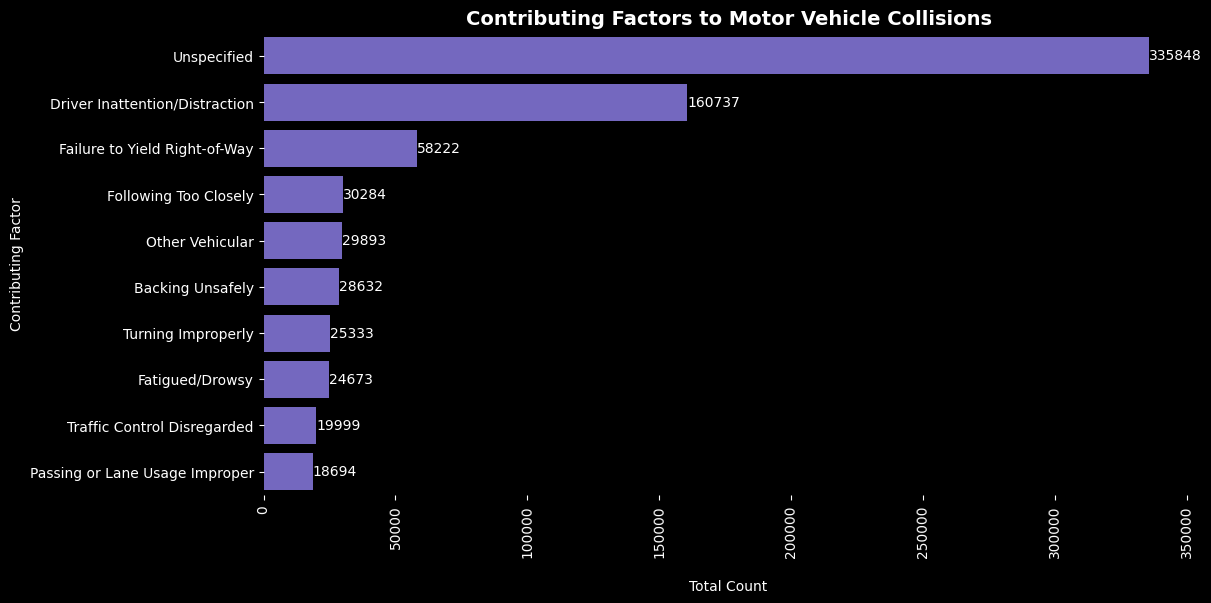

In [32]:
# What reasons are stated as contributing factors to the crashes?
contributing_factors = motor_collisions.groupby('CONTRIBUTING FACTOR')['COLLISION_ID'].count().reset_index(name='Total Count').sort_values(by='Total Count', ascending=False)
contributing_factors_top = contributing_factors.nlargest(10, 'Total Count')
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=contributing_factors_top, x='Total Count', y='CONTRIBUTING FACTOR', ax=ax, color='slateblue')
ax.set_title('Contributing Factors to Motor Vehicle Collisions', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count', ylabel='Contributing Factor')
ax.tick_params(axis='x', rotation = 90.5)
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()